# Biogas Project

## Preparations

In [1]:
%%bash
cd ~
mkdir RNASeq

In [2]:
%cd RNASeq/

/home/rw/RNASeq


In [3]:
!pwd

/home/rw/RNASeq


In [4]:
%cd ~

/home/rw


In [5]:
!ls

book_biogas_project.ipynb  Pictures				 snap
Desktop			   Public				 Templates
Documents		   RNASeq				 Videos
Downloads		   Schnellkurs-Bioinformatik-master
Music			   Schnellkurs-Bioinformatik-master.zip


In [6]:
%cd RNASeq/

/home/rw/RNASeq


### Loading Data

In [7]:
!wget -q 'datenmassen.hs-mittweida.de/biogas.fastq.gz'

In [8]:
!gunzip biogas.fastq.gz

In [9]:
!head -4 biogas.fastq

@HWI-D00473:116:C3JA0ACXX:2:1101:1391:1989 1:N:0:ACAGTG
TTTTCACGGGCTCCAGGAATTTGCCGGGTTACCCCATCACGCCTTCACTCGCTTCTCACCATGGCGGTACTCCACGAGCTTGAACGCTTGGACAGAGCGA
+
1=DDDBDDDDDDEIBEDE;AEE@DCDDDDDCEDED?DDCICBAAAC;CEIIDDDDDD3AAAA:>@?=8;>AAAA<>99>>A>>::1;><<7AA:<>>A95


In [11]:
%%bash
wget -q 'datenmassen.hs-mittweida.de/16s-archaea.fasta.gz'
gunzip 16s-archaea.fasta.gz
head -1 16s-archaea.fasta

>AY234332.1.1262 Archaea;Euryarchaeota;Methanomicrobia;Methanomicrobiales;Methanomicrobiales Incertae Sedis;Methanocalculus;Methanocalculus chunghsingensis


In [12]:
! awk '{ORS="";if($0~/>/){print "\n"$O"\t"}else{print $0}}' 16s-archaea.fasta | sed '1d' | egrep -vi '(uncultured|enrichment|unidentified|candidatus|sp\.)' | sed 's/;.*;/ /' | sed 's/\t/\n/' > 16s-archaea-kurz.fasta

### Installation of Trimmomatic

In [25]:
!pkexec apt-get -y install trimmomatic #prompt for pwd and ommit Y/N

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  ca-certificates-java default-jre default-jre-headless fonts-dejavu-extra
  java-common libatk-wrapper-java libatk-wrapper-java-jni libjbzip2-java
  openjdk-11-jre openjdk-11-jre-headless
Suggested packages:
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  | fonts-wqy-zenhei
The following NEW packages will be installed:
  ca-certificates-java default-jre default-jre-headless fonts-dejavu-extra
  java-common libatk-wrapper-java libatk-wrapper-java-jni libjbzip2-java
  openjdk-11-jre openjdk-11-jre-headless trimmomatic
0 upgraded, 11 newly installed, 0 to remove and 82 not upgraded.
Need to get 44,5 MB of archives.
After this operation, 180 MB of additional disk space will be used.
Get:1 http://de.archive.ubuntu.com/ubuntu impish/main amd64 java-common all 0.72build1 [6.892 B]
Get:2 http://de.archive.ubuntu.com/ubuntu impis

Adding debian:Starfield_Root_Certificate_Authority_-_G2.pem
Adding debian:emSign_ECC_Root_CA_-_C3.pem
Adding debian:DigiCert_Global_Root_G2.pem
Adding debian:OISTE_WISeKey_Global_Root_GC_CA.pem
Adding debian:SSL.com_EV_Root_Certification_Authority_ECC.pem
Adding debian:DigiCert_Trusted_Root_G4.pem
Adding debian:Amazon_Root_CA_2.pem
Adding debian:Amazon_Root_CA_4.pem
Adding debian:QuoVadis_Root_CA_2.pem
Adding debian:Sonera_Class_2_Root_CA.pem
Adding debian:Certigna.pem
Adding debian:SwissSign_Silver_CA_-_G2.pem
Adding debian:Baltimore_CyberTrust_Root.pem
Adding debian:AffirmTrust_Premium.pem
Adding debian:DigiCert_Assured_ID_Root_G2.pem
Adding debian:TrustCor_RootCert_CA-1.pem
Adding debian:DigiCert_Global_Root_G3.pem
Adding debian:NetLock_Arany_=Class_Gold=_Főtanúsítvány.pem
Adding debian:SSL.com_Root_Certification_Authority_RSA.pem
Adding debian:AffirmTrust_Premium_ECC.pem
Adding debian:Trustwave_Global_ECC_P256_Certification_Authority.pem
Adding debian:GTS_Root_R3.pem
Adding debian:

In [26]:
!java -jar /usr/share/java/trimmomatic.jar

Usage: 
       PE [-version] [-threads <threads>] [-phred33|-phred64] [-trimlog <trimLogFile>] [-summary <statsSummaryFile>] [-quiet] [-validatePairs] [-basein <inputBase> | <inputFile1> <inputFile2>] [-baseout <outputBase> | <outputFile1P> <outputFile1U> <outputFile2P> <outputFile2U>] <trimmer1>...
   or: 
       SE [-version] [-threads <threads>] [-phred33|-phred64] [-trimlog <trimLogFile>] [-summary <statsSummaryFile>] [-quiet] <inputFile> <outputFile> <trimmer1>...
   or: 
       -version


In [27]:
!ls

16s-archaea.fasta  16s-archaea-kurz.fasta  biogas.fastq


### Installation of FastQC

In [29]:
!pkexec apt-get -y install fastqc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  ant ant-optional libactivation-java libaec0 libaopalliance-java
  libapache-pom-java libargs4j-java libatinject-jsr330-api-java
  libcdi-api-java libcodemodel-java libcommons-cli-java libcommons-codec-java
  libcommons-compress-java libcommons-io-java libcommons-jexl2-java
  libcommons-lang3-java libcommons-logging-java libcommons-math3-java
  libcommons-parent-java libdom4j-java libdtd-parser-java libfastinfoset-java
  libfindbin-libs-perl libgeronimo-annotation-1.3-spec-java
  libgeronimo-interceptor-3.0-spec-java libguava-java libguice-java
  libhawtjni-runtime-java libhdf5-103-1 libhtsjdk-java libhttpclient-java
  libhttpcore-java libistack-commons-java libjansi-java libjansi-native-java
  libjaxb-api-java libjaxb-java libjaxen-java libjsoup-java libjsr305-java
  libmaven-file-management-java libmaven-parent-java libmaven-resolver-j

Get:36 http://de.archive.ubuntu.com/ubuntu impish/universe amd64 libsisu-plexus-java all 0.3.4-3 [181 kB]
Get:37 http://de.archive.ubuntu.com/ubuntu impish/universe amd64 libmaven3-core-java all 3.6.3-5 [1.535 kB]
Get:38 http://de.archive.ubuntu.com/ubuntu impish/universe amd64 libmaven-shared-io-java all 3.0.0-3 [33,3 kB]
Get:39 http://de.archive.ubuntu.com/ubuntu impish/universe amd64 libmaven-file-management-java all 3.0.0-1 [35,1 kB]
Get:40 http://de.archive.ubuntu.com/ubuntu impish/universe amd64 libplexus-io-java all 3.2.0-1.1 [64,8 kB]
Get:41 http://de.archive.ubuntu.com/ubuntu impish/main amd64 libsnappy1v5 amd64 1.1.8-1build1 [16,7 kB]
Get:42 http://de.archive.ubuntu.com/ubuntu impish/universe amd64 libsnappy-jni amd64 1.1.8.3-1 [6.756 B]
Get:43 http://de.archive.ubuntu.com/ubuntu impish/universe amd64 libsnappy-java all 1.1.8.3-1 [93,9 kB]
Get:44 http://de.archive.ubuntu.com/ubuntu impish/universe amd64 libxz-java all 1.8-2 [140 kB]
Get:45 http://de.archive.ubuntu.com/ubuntu 

Selecting previously unselected package libjsr305-java.
Preparing to unpack .../19-libjsr305-java_0.1~+svn49-11_all.deb ...
Unpacking libjsr305-java (0.1~+svn49-11) ...
Selecting previously unselected package libguava-java.
Preparing to unpack .../20-libguava-java_29.0-6_all.deb ...
Unpacking libguava-java (29.0-6) ...
Selecting previously unselected package libguice-java.
Preparing to unpack .../21-libguice-java_4.2.3-2_all.deb ...
Unpacking libguice-java (4.2.3-2) ...
Selecting previously unselected package libmaven-parent-java.
Preparing to unpack .../22-libmaven-parent-java_31-2_all.deb ...
Unpacking libmaven-parent-java (31-2) ...
Selecting previously unselected package libplexus-utils2-java.
Preparing to unpack .../23-libplexus-utils2-java_3.3.0-1_all.deb ...
Unpacking libplexus-utils2-java (3.3.0-1) ...
Selecting previously unselected package libwagon-provider-api-java.
Preparing to unpack .../24-libwagon-provider-api-java_3.3.4-1_all.deb ...
Unpacking libwagon-provider-api-java

Selecting previously unselected package libhtsjdk-java.
Preparing to unpack .../66-libhtsjdk-java_2.23.0+dfsg-2_all.deb ...
Unpacking libhtsjdk-java (2.23.0+dfsg-2) ...
Selecting previously unselected package libfindbin-libs-perl.
Preparing to unpack .../67-libfindbin-libs-perl_2.190.02-1_all.deb ...
Unpacking libfindbin-libs-perl (2.190.02-1) ...
Selecting previously unselected package libsis-base-jni.
Preparing to unpack .../68-libsis-base-jni_18.09~pre1+git20180928.45fbd31+dfsg-3_amd64.deb ...
Unpacking libsis-base-jni (18.09~pre1+git20180928.45fbd31+dfsg-3) ...
Selecting previously unselected package libsis-base-java.
Preparing to unpack .../69-libsis-base-java_18.09~pre1+git20180928.45fbd31+dfsg-3_all.deb ...
Unpacking libsis-base-java (18.09~pre1+git20180928.45fbd31+dfsg-3) ...
Selecting previously unselected package libaec0:amd64.
Preparing to unpack .../70-libaec0_1.0.4-3_amd64.deb ...
Unpacking libaec0:amd64 (1.0.4-3) ...
Selecting previously unselected package libsz2:amd64.
P

In [30]:
!fastqc --version

FastQC v0.11.9


### Installation of FastX-Toolkit

In [37]:
!wget 'http://ftp.de.debian.org/debian/pool/main/f/fastx-toolkit/fastx-toolkit_0.0.14-6_amd64.deb'

--2022-01-06 22:34:17--  http://ftp.de.debian.org/debian/pool/main/f/fastx-toolkit/fastx-toolkit_0.0.14-6_amd64.deb
Resolving ftp.de.debian.org (ftp.de.debian.org)... 141.76.2.4
Connecting to ftp.de.debian.org (ftp.de.debian.org)|141.76.2.4|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112440 (110K) [application/x-debian-package]
Saving to: ‘fastx-toolkit_0.0.14-6_amd64.deb’

fastx-toolkit_0.0.1 100%[===================>] 109,80K  --.-KB/s    in 0,1s    

2022-01-06 22:34:18 (914 KB/s) - ‘fastx-toolkit_0.0.14-6_amd64.deb’ saved [112440/112440]



In [39]:
!ls

16s-archaea.fasta	biogas.fastq
16s-archaea-kurz.fasta	fastx-toolkit_0.0.14-6_amd64.deb


In [51]:
%mkdir fastx-toolkit

In [52]:
%cd fastx-toolkit

/home/rw/RNASeq/fastx-toolkit


In [53]:
!pwd

/home/rw/RNASeq/fastx-toolkit


In [54]:
!wget http://hannonlab.cshl.edu/fastx_toolkit/fastx_toolkit_0.0.13_binaries_Linux_2.6_amd64.tar.bz2

--2022-01-06 22:54:58--  http://hannonlab.cshl.edu/fastx_toolkit/fastx_toolkit_0.0.13_binaries_Linux_2.6_amd64.tar.bz2
Resolving hannonlab.cshl.edu (hannonlab.cshl.edu)... 143.48.220.12
Connecting to hannonlab.cshl.edu (hannonlab.cshl.edu)|143.48.220.12|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5063685 (4,8M) [application/x-bzip2]
Saving to: ‘fastx_toolkit_0.0.13_binaries_Linux_2.6_amd64.tar.bz2’

fastx_toolkit_0.0.1 100%[===================>]   4,83M  1,39MB/s    in 3,5s    

2022-01-06 22:55:01 (1,39 MB/s) - ‘fastx_toolkit_0.0.13_binaries_Linux_2.6_amd64.tar.bz2’ saved [5063685/5063685]



In [55]:
!tar -xf fastx_toolkit_0.0.13_binaries_Linux_2.6_amd64.tar.bz2

In [56]:
# !pkexec sudo ./bin/* /usr/local/bin

### Installation of BLAST+

In [32]:
!pkexec apt-get -y install ncbi-blast+

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libmbedcrypto3 libmbedtls12 libmbedx509-0 ncbi-data
The following NEW packages will be installed:
  libmbedcrypto3 libmbedtls12 libmbedx509-0 ncbi-blast+ ncbi-data
0 upgraded, 5 newly installed, 0 to remove and 82 not upgraded.
Need to get 14,9 MB of archives.
After this operation, 75,1 MB of additional disk space will be used.
Get:1 http://de.archive.ubuntu.com/ubuntu impish/universe amd64 libmbedcrypto3 amd64 2.16.9-0.1ubuntu1 [152 kB]
Get:2 http://de.archive.ubuntu.com/ubuntu impish/universe amd64 libmbedx509-0 amd64 2.16.9-0.1ubuntu1 [42,3 kB]
Get:3 http://de.archive.ubuntu.com/ubuntu impish/universe amd64 libmbedtls12 amd64 2.16.9-0.1ubuntu1 [72,4 kB]
Get:4 http://de.archive.ubuntu.com/ubuntu impish/universe amd64 ncbi-data all 6.1.20170106+dfsg1-9 [3.519 kB]
Get:5 http://de.archive.ubuntu.com/ubuntu impish/universe amd64 ncbi-blas

In [33]:
!blastn -version

blastn: 2.10.1+
 Package: blast 2.10.1, build Oct 23 2020 21:23:46


This command does not work: `!trimm() { java -jar /usr/share/java/trimmomatic.jar $@; }`
Instead, you always have to provide the full path!



## Preparating Data

### Select annotated archae only:

In [58]:
%cd ..

/home/rw/RNASeq


In [59]:
! awk '{ORS="";if($0~/>/){print "\n"$O"\t"}else{print $0}}' 16s-archaea.fasta | sed '1d' | egrep -vi '(uncultured|enrichment|unidentified|candidatus|sp\.)' | sed 's/;.*;/ /' | sed 's/\t/\n/' | head -4 # ignore error

>AY234332.1.1262 Archaea Methanocalculus chunghsingensis
GUGAAAGACCUCGGCAUACUGCUCAGUAACACGUGGAUAAUCUGCCCUCAGGUGAGGAAUAAUCCCGGGAAACUGGGGCUAAUACCUCAUAGGAGACGGGUGCUGGAAUGCUCUGUCUCUGAAAGGUCCGCCGCCUGAGGAUGAGUCUGCGUCCGAUUAGGUUGUUGUUGGGGUAACGGCCCACCAAGCCAUUGAUCGGUACGGGUUGUGAGAGCAAGAGCCCGGAGAUGGAUUCUGAGACAUGAAUCCAGGCCCUACGGGGCGCAGCAGGCGCGAAAACUUUACAAUGCGAGCAAUCGUGAUAAGGAAACCCUGAGUGCCUGUCAAUGCAGGCUGUUCUGGUGUUUAGUCAGCACCAGGAGAAAGGGCGGGGCAAGACCGGUGCCAGCCGCCGCGGUAAUACCGGCUGCUCGAGUGAUAGCCACUUUUACUGGGCUUAAAGCGUUCGUAGCUUGGUCGUUAAGUCUCUGGGGAAAUCUUUUGGCUCAACCAAAAGACGUCUCAGAGAAACUGGCGACCUUGGGACCGGGAGAGGUAAGACGUACUUCGGGGGUAGGAGUGAAAUCUUGUAAUCCCCGAGGGACGACCGAUGGCGAAGGCAUCUUACCAGAACGGCUCCGACAGUGAGGGACGAAAGCUGGGGGAGCAAACCGGAUUAGAUACCCGGGUAGUCCCAGCCGUAAACGAUGUGCGUUAGGUGUGUCAGUGACCACGAGUCACUGAGGUGCCGAAGGGAAACCGUGAAACGCACCGCCUGGGAAGUACGGUCGCAAGGCUGAAACUUAAAGGAAUUGGCGGGGGAGCACCACAACGGGUGGAGCCUGCGGUUUAAUUGGAUUCAACGCCGGACAACUCACCGGAUACGACAGCGGAAUGAUAGCCGGGCUGAAGACUCUGCUUGACCAGCUGAGAGGAGGUGCAUGGCCGUCGUCAGUUCGUACUG

### Quality Control Sequences I

In [61]:
!pwd

/home/rw/RNASeq


In [63]:
!./fastx-toolkit/bin/fastx_quality_stats -Q33 -i biogas.fastq -o biogas-qc.tab

In [64]:
!ls -lh

total 60M
-rw-rw-r-- 1 rw rw  29M Nov 18  2015 16s-archaea.fasta
-rw-rw-r-- 1 rw rw 2,4M Jan  6 21:55 16s-archaea-kurz.fasta
-rw-rw-r-- 1 rw rw  24M Mär 10  2015 biogas.fastq
-rw-rw-r-- 1 rw rw 7,9K Jan  7 09:46 biogas-qc.tab
drwxrwxr-x 3 rw rw 4,0K Jan  6 22:55 fastx-toolkit
-rw-rw-r-- 1 rw rw 4,9M Feb  1  2010 fastx_toolkit_0.0.13_binaries_Linux_2.6_amd64.tar.bz2
-rw-rw-r-- 1 rw rw 110K Sep 23  2018 fastx-toolkit_0.0.14-6_amd64.deb


In [65]:
!head biogas-qc.tab

column	count	min	max	sum	mean	Q1	med	Q3	IQR	lW	rW	A_Count	C_Count	G_Count	T_Count	N_Count	Max_count
1	100000	10	34	3212241	32.12	31	33	34	3	27	34	10024	49150	34994	5832	0	100000
2	100000	10	34	3214598	32.15	31	34	34	3	27	34	23702	21512	21420	33366	0	100000
3	100000	2	35	3221083	32.21	31	34	34	3	27	35	17373	33871	19181	29560	15	100000
4	100000	10	37	3576699	35.77	35	37	37	2	32	37	21992	38254	23616	16138	0	100000
5	100000	10	37	3579835	35.80	35	37	37	2	32	37	24061	20600	35874	19465	0	100000
6	100000	8	37	3389458	33.89	33	35	35	2	30	37	26887	21187	31970	19956	0	100000
7	100000	8	37	3439409	34.39	35	35	35	0	35	35	27413	19906	17262	35419	0	100000
8	100000	6	39	3466873	34.67	35	35	37	2	32	39	29814	25872	18204	26110	0	100000
9	100000	8	39	3675126	36.75	35	38	39	4	29	39	17510	24314	30779	27397	0	100000


In [66]:
!awk '$17>0{print $1,$2,$6,$17}' biogas-qc.tab | tee >(wc -l)

column count mean N_Count
3 100000 32.21 15
38 100000 36.27 15
46 100000 35.76 22
47 100000 35.62 23
48 100000 35.88 23
49 100000 35.90 23
50 100000 35.71 22
51 99902 35.24 28
52 99805 35.03 39
53 99715 34.72 28
54 99638 34.67 23
55 99540 34.74 16
56 99444 34.23 21
57 99358 34.20 24
58 99244 34.04 22
59 99125 33.95 1
60 98973 33.57 22
63 98349 32.91 31
64 97651 32.27 14


### Trim Sequences

In [67]:
!java -jar /usr/share/java/trimmomatic.jar SE -phred33 -trimlog biogas-trim.log biogas.fastq biogas-trim.fastq SLIDINGWINDOW:4:30 MINLEN:80

TrimmomaticSE: Started with arguments:
 -phred33 -trimlog biogas-trim.log biogas.fastq biogas-trim.fastq SLIDINGWINDOW:4:30 MINLEN:80
Automatically using 1 threads
Input Reads: 100000 Surviving: 24150 (24.15%) Dropped: 75850 (75.85%)
TrimmomaticSE: Completed successfully


### Quality Control Sequences II

In [70]:
!./fastx-toolkit/bin/fastx_quality_stats -Q33 -i biogas-trim.fastq -o biogas-trim-qc.tab

In [71]:
!awk '$17>0{print $1,$2,$6,$17}' biogas-trim-qc.tab

column count mean N_Count


### Convert to FastA

In [74]:
!./fastx-toolkit/bin/fastq_to_fasta -Q33 -i biogas-trim.fastq -o biogas-trim.fasta

In [75]:
!head -2 biogas-trim.fasta

>HWI-D00473:116:C3JA0ACXX:2:1101:16692:1990 1:N:0:ACAGTG
TACTACCAGGATTTTCGTCTCTACGCGGTCCACACCTGCTCACACAGATGCTTCTGCCCACGCAGAGCGCCTCCCTACTAGATCACCTCACG


## BLASTing Reads against rRNA

### Create BLASTDB

In [76]:
!makeblastdb -in 16s-archaea-kurz.fasta -dbtype nucl -title 'Archaea 16S rRNA short' -out archaea



Building a new DB, current time: 01/07/2022 09:50:02
New DB name:   /home/rw/RNASeq/archaea
New DB title:  Archaea 16S rRNA short
Sequence type: Nucleotide
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 1696 sequences in 0.0854449 seconds.




### BLAST …

In [77]:
!time blastn -db archaea -query biogas-trim.fasta -evalue 0.0001 -outfmt '6 ppos length evalue stitle qseqid' > pos-length-evalue-name-readid.archaea.tab


real	0m18,620s
user	0m17,718s
sys	0m0,491s


### Data Analysis

In [78]:
!head -5 pos-length-evalue-name-readid.archaea.tab

98.84	86	5.23e-39	JAHE01027406.1.1240 Archaea sediment metagenome	HWI-D00473:116:C3JA0ACXX:2:1101:2127:2120
97.67	86	2.43e-37	CP002565.836700.838167 Archaea Methanosaeta concilii GP6	HWI-D00473:116:C3JA0ACXX:2:1101:2127:2120
97.67	86	2.43e-37	CP002565.291377.292844 Archaea Methanosaeta concilii GP6	HWI-D00473:116:C3JA0ACXX:2:1101:2127:2120
97.67	86	2.43e-37	AB679168.1.1407 Archaea Methanosaeta concilii	HWI-D00473:116:C3JA0ACXX:2:1101:2127:2120
97.67	86	2.43e-37	KM408631.1.1459 Archaea Methanosarcina mazei	HWI-D00473:116:C3JA0ACXX:2:1101:2127:2120


In [79]:
!wc -l pos-length-evalue-name-readid.archaea.tab

281340 pos-length-evalue-name-readid.archaea.tab


In [80]:
!awk '{print $4}' pos-length-evalue-name-readid.archaea.tab | sort | uniq | wc -l

1683


In [84]:
!awk '{print $NF}' pos-length-evalue-name-readid.archaea.tab | sort | uniq | wc -l

1668


In [82]:
!awk '{print $4,$6,$7}' pos-length-evalue-name-readid.archaea.tab | sort | uniq -c | sort -nr | head -5 #ignore error

    981 CP002565.291377.292844 Methanosaeta concilii
    980 X51423.206.1677 Methanosaeta concilii
    980 X16932.1.1471 Methanosaeta concilii
    977 AB679168.1.1407 Methanosaeta concilii
    966 CP002565.836700.838167 Methanosaeta concilii
sort: write failed: 'standard output': Broken pipe
sort: write error


In [83]:
!awk '{print $NF}' pos-length-evalue-name-readid.archaea.tab | sort | uniq -c| sort -nr | head -5 #ignore error

    504 HWI-D00473:116:C3JA0ACXX:2:1101:6796:10186
    504 HWI-D00473:116:C3JA0ACXX:2:1101:17233:6637
    504 HWI-D00473:116:C3JA0ACXX:2:1101:17030:7694
    504 HWI-D00473:116:C3JA0ACXX:2:1101:16980:20995
    504 HWI-D00473:116:C3JA0ACXX:2:1101:16574:18992
sort: write failed: 'standard output': Broken pipe
sort: write error


Änderung von \\$1==100 in \\$1>99 notwendig ...

In [89]:
!awk -F"\t" '$1>99 && $3<4e-45{print $4}' pos-length-evalue-name-readid.archaea.tab | awk '{print $3,$4,$5}' | sort | uniq -c | sort -nr | head

    252 Methanoculleus bourgensis 
    212 Methanosaeta concilii 
    141 Methanoculleus marisnigri 
    121 Methanosaeta concilii GP6
    116 Methanoculleus thermophilus 
     77 Methanoculleus receptaculi 
     74 Methanocalculus taiwanensis 
     73 Methanoculleus palmolei 
     48 Methanosaeta thermophila PT
     46 Methanoculleus hydrogenitrophicus 


In [90]:
!awk -F"\t" '$1>99 && $3<4e-45{print $4}' pos-length-evalue-name-readid.archaea.tab | awk '{print $3,$4,$5}' | sort | uniq -c | wc -l

56


In [91]:
!awk -F"\t" '$1>99 && $3<4e-45{print $4}' pos-length-evalue-name-readid.archaea.tab | awk '{print $3,$4,$5}' | sort | uniq -c | sort -nr | tail -5

      1 sediment metagenome 
      1 Methanogenium marinum 
      1 Methanogenium frigidum 
      1 Methanogenium cariaci 
      1 methanogenic archaeon CH1270


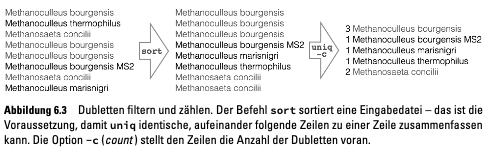

In [92]:
!awk -F"\t" '$1>99 && $3<4e-45{print $4}' pos-length-evalue-name-readid.archaea.tab | awk '{print $3,$4,$5}' | sort | uniq -c | sort -nr | awk '{org[$2" "$3]+=$1}END{for(i in org){print org[i],i}}' | sort -nr | head -5

333 Methanosaeta concilii
296 Methanoculleus bourgensis
171 Methanoculleus marisnigri
116 Methanoculleus thermophilus
77 Methanoculleus receptaculi


In [93]:
!ls

16s-archaea.fasta	biogas-qc.tab
16s-archaea-kurz.fasta	biogas-trim.fasta
archaea.ndb		biogas-trim.fastq
archaea.nhr		biogas-trim.log
archaea.nin		biogas-trim-qc.tab
archaea.not		fastx-toolkit
archaea.nsq		fastx_toolkit_0.0.13_binaries_Linux_2.6_amd64.tar.bz2
archaea.ntf		fastx-toolkit_0.0.14-6_amd64.deb
archaea.nto		pos-length-evalue-name-readid.archaea.tab
biogas.fastq
